In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [6]:
data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess

In [7]:
data_train = data_train.replace(['female','male'],[0,1])
data_train = data_train.replace(['S','C','Q'],[0,1,2])
data_train = data_train.fillna(10)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,10,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,10,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,10,0.0


In [8]:
X_train = np.array(data_train[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch']])
Y_train = np.array(data_train[['Survived']])

X_train.shape

(891, 5)

## Model

In [9]:
model = tf.keras.models.Sequential([
    Dense(512 , activation='relu'),
    Dense(256 , activation='relu'),
    Dense(128 , activation='relu'),
    Dense(2 , activation='softmax'),
])

In [10]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy']
              )

### train

In [11]:
train_output = model.fit(X_train, Y_train ,epochs=200)

Epoch 1/200
28/28 [==============================] - 1s 3ms/step - loss: 1.8290 - accuracy: 0.5993
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.6992
Epoch 3/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5107 - accuracy: 0.7901
Epoch 4/200
28/28 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.7879
Epoch 5/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.7969
Epoch 6/200
28/28 [==============================] - 0s 4ms/step - loss: 0.4860 - accuracy: 0.7868
Epoch 7/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.7957
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7991
Epoch 9/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.8103
Epoch 10/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.8002
Epoch 11/

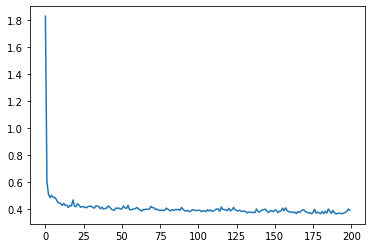

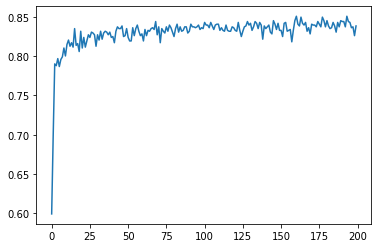

In [12]:
plt.plot(train_output.history['loss'])
plt.show()
plt.plot(train_output.history['accuracy'])
plt.show()

In [13]:
model.save("my_titanic.h5")
# model = tf.keras.models.load_model("my_titanic.h5")

In [14]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
data_test = data_test.replace(['female','male'],[0,1])
data_test = data_test.replace(['S','C','Q'],[0,1,2])
data_test = data_test.fillna(10)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,10,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,10,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,10,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,10,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,10,0


In [16]:
X_test = np.array(data_train[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch']])
Y_test = np.array(data_train[['Survived']])

results = model.evaluate(X_test, Y_test)
print("acc : ", results[1])

28/28 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8361
acc :  0.8361391425132751


### KNN

In [17]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, Y_train)

Y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred.round())
accuracy

0.8720538720538721

### MLP advanced

In [18]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
clf.predict_proba(X_test)

clf.predict(X_test)

accuracy = clf.score(X_test, Y_test)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8305274971941639

### Perceptron

In [19]:
p = Perceptron(random_state=42)
p.fit(X_train, Y_train)

Y_pred = p.predict(X_test)
test_score = accuracy_score(Y_test, Y_pred)
print("score on train data: ", test_score)

score on train data:  0.7968574635241302


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test

In [20]:
jack = np.array([[1,1,36,0,0]])
result = model.predict(jack)
np.argmax(result)

0